In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [25]:
NUM_CLASSES = 2

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1092 (4.27 KB)
Trainable params: 1092 (4.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/6 [====>.........................] - ETA: 3s - loss: 0.8382 - accuracy: 0.4375
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 1s 44ms/step - loss: 0.8161 - accuracy: 0.4718 - val_loss: 0.7160 - val_accuracy: 0.4980
Epoch 2/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.7534 - accuracy: 0.4844
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.7537 - accuracy: 0.4853 - val_loss: 0.6756 - val_accuracy: 0.5382
Epoch 3/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.7495 - accuracy: 0.4922
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.7201 - accuracy: 0.5054 - val_loss: 0.6493 - val_accuracy: 0.7631
Epoch 4/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.7061 - accuracy: 0.5000
Epoch 4: sav

C:\Users\16306\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 12ms/step - loss: 0.6892 - accuracy: 0.5550 - val_loss: 0.6250 - val_accuracy: 0.7952
Epoch 5/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.6589 - accuracy: 0.6094
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.6651 - accuracy: 0.6072 - val_loss: 0.5996 - val_accuracy: 0.9277
Epoch 6/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.6645 - accuracy: 0.6016
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 11ms/step - loss: 0.6431 - accuracy: 0.6139 - val_loss: 0.5758 - val_accuracy: 0.9518
Epoch 7/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.6214 - accuracy: 0.6719
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.6159 - accuracy: 0.6515 - val_loss: 0.5538 -

Epoch 32/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.8750
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.2640 - accuracy: 0.9008 - val_loss: 0.0826 - val_accuracy: 1.0000
Epoch 33/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2283 - accuracy: 0.9219
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.2694 - accuracy: 0.8968 - val_loss: 0.0765 - val_accuracy: 1.0000
Epoch 34/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2382 - accuracy: 0.9219
Epoch 34: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 13ms/step - loss: 0.2624 - accuracy: 0.8995 - val_loss: 0.0711 - val_accuracy: 1.0000
Epoch 35/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8828
Epoch

1/6 [====>.........................] - ETA: 0s - loss: 0.1638 - accuracy: 0.9453
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.1795 - accuracy: 0.9343 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 60/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1296 - accuracy: 0.9609
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.1527 - accuracy: 0.9410 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 61/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1852 - accuracy: 0.9219
Epoch 61: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.1603 - accuracy: 0.9464 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 62/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1985 - accuracy: 0.9297
Epoch 62: saving mo

6/6 [==============================] - 0s 12ms/step - loss: 0.1661 - accuracy: 0.9477 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 87/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1033 - accuracy: 0.9688
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.1236 - accuracy: 0.9598 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 88/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1387 - accuracy: 0.9531
Epoch 88: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.1287 - accuracy: 0.9558 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 89/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1040 - accuracy: 0.9688
Epoch 89: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.1390 - accuracy: 0.9504 - val_loss: 0.

Epoch 114/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1026 - accuracy: 0.9531
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.1016 - accuracy: 0.9638 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 115/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1369 - accuracy: 0.9531
Epoch 115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 10ms/step - loss: 0.1215 - accuracy: 0.9558 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 116/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1141 - accuracy: 0.9688
Epoch 116: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.1368 - accuracy: 0.9517 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 117/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0685 - accuracy: 0.976

1/6 [====>.........................] - ETA: 0s - loss: 0.1202 - accuracy: 0.9531
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.1079 - accuracy: 0.9651 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 142/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1050 - accuracy: 0.9766
Epoch 142: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.1043 - accuracy: 0.9598 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 143/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0557 - accuracy: 0.9922
Epoch 143: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 13ms/step - loss: 0.0988 - accuracy: 0.9638 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 144/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1140 - accuracy: 0.9609
Epoch 144: sa

1/6 [====>.........................] - ETA: 0s - loss: 0.1073 - accuracy: 0.9766
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.0862 - accuracy: 0.9718 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 169/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0912 - accuracy: 0.9609
Epoch 169: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.0978 - accuracy: 0.9625 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 170/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1472 - accuracy: 0.9375
Epoch 170: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.0918 - accuracy: 0.9598 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 171/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0722 - accuracy: 0.9844
Epoch 171: sa

1/6 [====>.........................] - ETA: 0s - loss: 0.0673 - accuracy: 0.9766
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.0852 - accuracy: 0.9705 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 196/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0446 - accuracy: 0.9844
Epoch 196: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 13ms/step - loss: 0.0796 - accuracy: 0.9759 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 197/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0995 - accuracy: 0.9531
Epoch 197: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.0873 - accuracy: 0.9625 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 198/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0789 - accuracy: 0.9688
Epoch 198: sa

In [34]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000


In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 59ms/step
[0.00401148 0.99598855]
1


# 混同行列

8/8 [==============================] - 0s 2ms/step


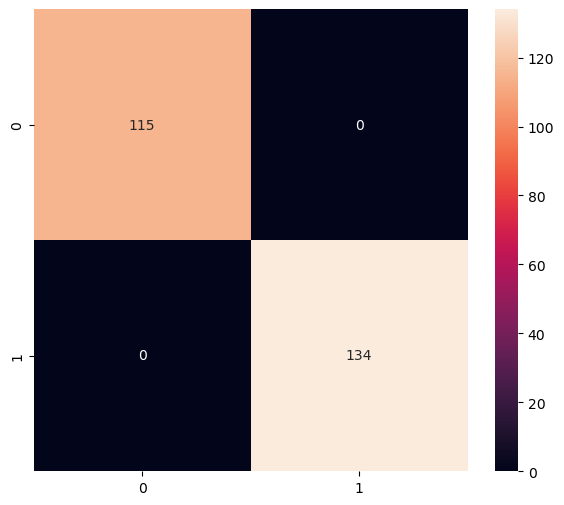

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       134

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

C:\Users\16306\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\16306\AppData\Local\Temp\tmpsqce7osy\assets


INFO:tensorflow:Assets written to: C:\Users\16306\AppData\Local\Temp\tmpsqce7osy\assets


6484

# 推論テスト

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00401148 0.99598855]
1
